# Relatório de Análise I
---

## Importação das bibliotecas

In [109]:
import pandas as pd

## Importando banco de dados

In [110]:
dados = pd.read_csv('data/aluguel.csv', sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [111]:
type(dados)

pandas.core.frame.DataFrame

In [112]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [113]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


## Informações gerais sobre a Base de Dados

In [114]:
dados.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [115]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns=['Tipos de  Dados'])

In [116]:
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [117]:
# Quantidade de registros e colunas na base de dados
dados.shape

(32960, 9)

In [118]:
print(f'A base de dados apresenta {dados.shape[0]} registros (imóveis) e {dados.shape[1]} variáveis')

A base de dados apresenta 32960 registros (imóveis) e 9 variáveis


# Relatório de Análise II
---

## Tipos de Imóveis

In [119]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [120]:
dados.Tipo

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [121]:
tipo_de_imovel = dados.Tipo
type(tipo_de_imovel)

pandas.core.series.Series

In [122]:
tipo_de_imovel.drop_duplicates(inplace=True)

In [123]:
tipo_de_imovel

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

## Organizando a visualização

In [124]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)

In [125]:
tipo_de_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [126]:
tipo_de_imovel.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [127]:
tipo_de_imovel.shape[0]

22

In [128]:
range(tipo_de_imovel.shape[0])

range(0, 22)

In [129]:
# Modificando o index utilizando a função range com o shape(tamanho do dataframe)
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])

In [130]:
tipo_de_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [131]:
tipo_de_imovel.columns.name = 'Id'

In [132]:
tipo_de_imovel

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Relatórios de Análise III
---

## Imóveis Residenciais 

In [133]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [134]:
list(dados.Tipo.drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [135]:
residencial = [ 
    'Quitinete',
    'Casa',
    'Apartamento',
    'Casa de Condomínio',
    'Casa de Vila'             
]
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [136]:
selecao_residencial = dados.Tipo.isin(residencial)
selecao_residencial

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [137]:
dados_residencial = dados[selecao_residencial]
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [138]:
list(dados_residencial.Tipo.drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [139]:
dados_residencial.shape[0]

22580

In [140]:
dados.shape[0]

32960

In [141]:
dados_residencial.index = [i for i in range(dados_residencial.shape[0])]
dados_residencial.head(15)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


## Exportando a Base de dados

In [142]:
dados_residencial.to_csv('data/aluguel_residencial.csv', sep=';', index=False)

# Relatório de Análise IV
---

## Seleções e Frequências

In [143]:
dados = pd.read_csv('data/aluguel_residencial.csv', sep=';')

In [144]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [145]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'
selecao = dados.Tipo == 'Apartamento'
n1 = dados[selecao].shape[0]
n1

19532

In [146]:
# Selecione os imóveis classificados com tipos ' Casa', 'Casa de Condomínio' e 'Casa de Vila'
selecao_casa = dados.Tipo == 'Casa'
selecao_condom = dados.Tipo == 'Casa de Condomínio'
selecao_vila = dados.Tipo == 'Casa de Vila'
n2 = dados.loc[selecao_casa | selecao_condom | selecao_vila ].shape[0]
n2

2212

In [147]:
# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites
selecao_60 = dados.Area >= 60
selecao_100 = dados.Area <= 100
n3 = dados.loc[selecao_60 & selecao_100].shape[0]
n3

8719

In [148]:
# Selecione os ímoveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00
selecao_quartos = dados.Quartos >= 4
selecao_aluguel = dados.Valor < 2000
n4 = dados.loc[selecao_quartos & selecao_aluguel].shape[0]
n4

41

In [149]:
print(
f"""
Nº de imóveis classificados com tipo 'Apartamento' -> {n1}
Nº de imóveis classificados com tipos ' Casa', 'Casa de Condomínio' e 'Casa de Vila' -> {n2}
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {n3}
Nº de ímoveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {n4}
""")


Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos ' Casa', 'Casa de Condomínio' e 'Casa de Vila' -> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 8719
Nº de ímoveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 41



# Relatório de Análise V
---

## Tratando dados faltantes

In [150]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [151]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [152]:
dados.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


In [153]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [154]:
filtro = dados.Valor.isnull()
dados.loc[filtro]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [155]:
A = dados.shape[0]
dados.dropna(subset= ['Valor'], inplace=True)
B= dados.shape[0]
A - B

9

In [156]:
dados[dados.Condominio.isnull()].shape[0]

1813

In [157]:
selecao = (dados['Tipo'] == 'Apartamento') & (dados.Condominio.isnull())

In [158]:
A = dados.shape[0]
dados = dados[~selecao]
B= dados.shape[0]
A - B

745

In [159]:
dados = dados.fillna({'Condominio':0, 'IPTU': 0})

In [160]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [161]:
dados.to_csv('data/aluguel_residencial.csv', sep=';', index=False)

In [162]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Relatório de Análise VI
---

## Criando Novas Variáveis

In [163]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [164]:
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']

In [165]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0


In [166]:
dados['Valor m2'] = dados.Valor / dados.Area

In [167]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.500000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.000000
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.333333
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.666667
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.000000
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.333333
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.384615
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.428571
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.666667
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.000000


In [168]:
dados['Valor m2'] = dados['Valor m2'].round(2)

In [169]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00


In [170]:
dados['Valor Bruto m2'] = (dados['Valor Bruto'] / dados.Area).round(2)

In [171]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28


In [172]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [173]:
dados['Tipo Agregado'] = dados.Tipo.apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [174]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54,Apartamento
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartamento
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartamento
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartamento


## Excluindo Variáveis

In [103]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])

In [104]:
dados_aux.head(10)

,Tipo Agregado,Valor m2,Valor Bruto,Valor Bruto m2
0,Apartamento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,53.33,1210.0,80.67
3,Apartamento,16.67,1030.0,21.46
4,Apartamento,26.00,1618.0,32.36
5,Casa,29.33,22000.0,29.33
6,Casa,15.38,1000.0,15.38
7,Apartamento,21.43,2216.0,31.66
8,Apartamento,16.67,1969.0,21.88
9,Apartamento,50.00,2611.0,65.28


In [105]:
del dados_aux['Valor Bruto']

In [106]:
dados_aux.head()

,Tipo Agregado,Valor m2,Valor Bruto m2
0,Apartamento,42.50,56.50
1,Casa,70.00,70.00
2,Apartamento,53.33,80.67
3,Apartamento,16.67,21.46
4,Apartamento,26.00,32.36


In [175]:
dados_aux.pop('Valor Bruto m2')

0        56.50
1        70.00
2        80.67
3        21.46
4        32.36
         ...  
21821    20.54
21822    43.52
21823    33.85
21824    40.54
21825    53.71
Name: Valor Bruto m2, Length: 21826, dtype: float64

In [176]:
dados_aux.head()

,Tipo Agregado,Valor m2
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,53.33
3,Apartamento,16.67
4,Apartamento,26.00


In [178]:
dados.drop(['Valor Bruto', 'Valor Bruto m2'], axis=1, inplace = True)

In [179]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [180]:
dados.to_csv('data/aluguel_residencial.csv', sep=';', index=False)

# Relatório de Análise VII
---

## Criando agrupamentos

In [181]:
dados = pd.read_csv('data/aluguel_residencial.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [182]:
dados.Valor.mean()

5046.172821405663

In [183]:
grupo_bairro = dados.groupby('Bairro')

In [193]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2).head(10)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
Arpoador,12923.92,3493.92
Bancários,1825.00,217.00
Bangu,1016.00,92.25
Barra da Tijuca,7069.55,3591.01


## Estatística Descritivas

In [194]:
grupo_bairro.Valor.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [195]:
grupo_bairro.Valor.aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

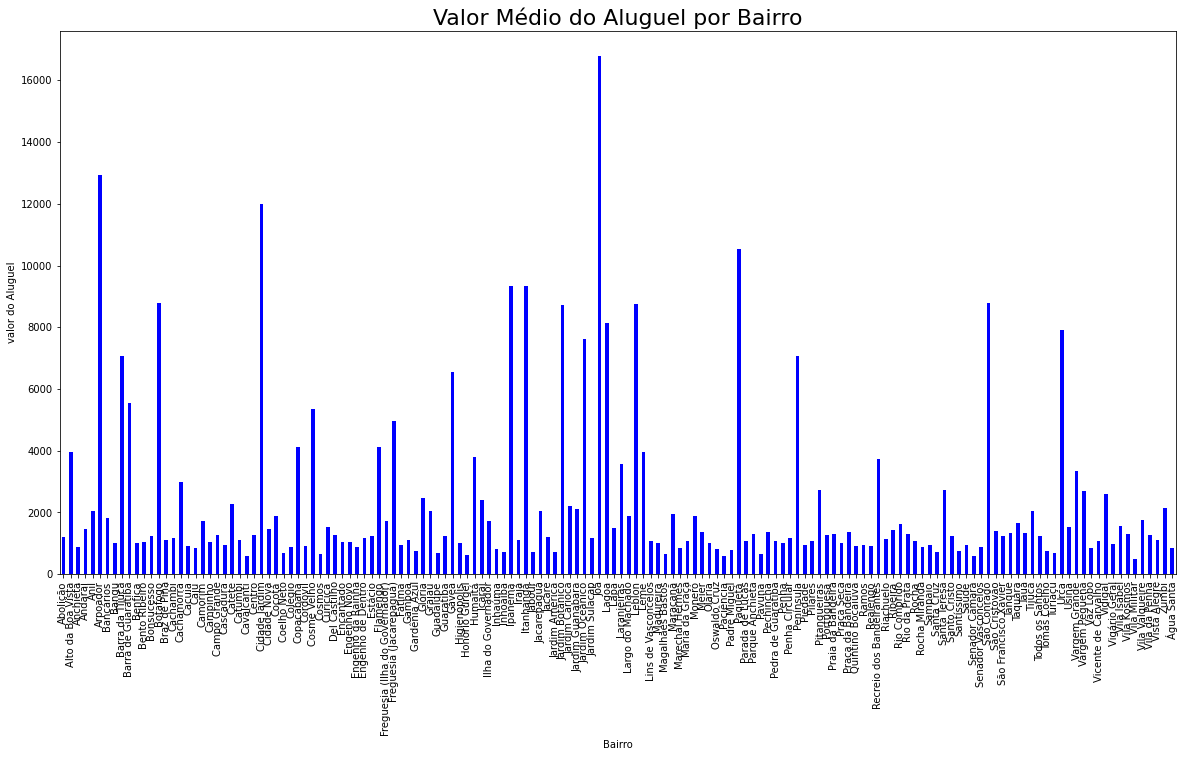

In [198]:
fig = grupo_bairro.Valor.mean().plot.bar(color = 'blue')
fig.set_ylabel('valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})